In [1]:
# only adjust settings in this cell
state = 'MS'
root_name = 'Harrison' # which county will root our first district 
k = 4                  # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or inverse_polsby_popper

In [2]:
filepath = '..\\dat\\'
filename = state + '_county.json'

from util import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
print("State has total of k =",G._k,"districts")

State has total of k = 4 districts


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 740319
Single district upper population limit U = 740320


In [5]:
# Require this county be in our first district
G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Harrison County to be the root. In our graph, this is vertex # 21


In [6]:
from optimization import districting_heuristic
import time

start_time = time.perf_counter()
plans = districting_heuristic(G, obj_type='cut_edges', enumeration_limit=10)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-16
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i9-13900K, instruction set [SSE2|AVX|AVX2]
Thread count: 24 physical cores, 32 logical processors, using up to 32 threads

Optimize a model with 654 rows, 771 columns and 3275 nonzeros
Model fingerprint: 0x19ce1025
Variable types: 405 continuous, 366 integer (366 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+06]
Presolve removed 89 rows and 87 columns
Presolve time: 0.00s
Presolved: 565 rows, 684 columns, 2723 nonzeros
Variable types: 401 continuous, 283 integer (283 binary)

Root relaxation: objective 2.420525e+00, 213 iterations, 0.00 se

In [7]:
print("Number of plans =",len(plans))
print("Total time =",time.perf_counter() - start_time)

Number of plans = 49
Total time = 2286.5970276000444


# cut_edges perimeter ave_invpp
0 78 47.6595 8.4909
1 85 49.4041 9.3502
2 86 50.0808 9.9383
3 83 49.3536 9.6892
4 83 49.7273 9.8103
5 82 48.664 9.3123
6 80 48.9343 9.43
7 85 50.8642 10.3677
8 86 50.5492 10.1642
9 82 50.1804 10.116
10 83 49.2929 9.5876
11 84 50.3274 10.0656
12 89 50.5634 9.9648
13 88 50.5809 10.0799
14 89 50.9927 10.4336
15 82 48.7192 9.217
16 87 50.4409 9.9924
17 81 48.2916 8.9168
18 89 51.2963 10.4144
19 94 52.9868 11.2438
20 85 50.4803 10.0488


C:\Users\buchanan\AppData\Local\anaconda3\Lib\site-packages\geopandas\plotting.py:673: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


21 88 52.1102 10.8117
22 81 49.1329 9.2502
23 81 49.5662 9.6927
24 78 47.9557 8.6834
25 80 49.309 9.3098
26 82 48.1786 8.8132
27 73 47.2667 8.6187
28 77 47.9612 8.8108
29 79 47.3255 8.5947
30 82 49.0114 9.1405
31 83 49.1435 9.2087
32 81 49.2684 9.9828
33 76 46.9679 9.0303
34 79 49.2445 9.9779
35 81 50.0862 9.7203
36 80 49.0962 9.5833
37 73 47.2901 8.4427
38 70 46.3102 8.2503
39 63 44.7014 7.2111
40 63 43.6576 6.7849
41 66 45.144 7.4416
42 67 47.0798 8.3321
43 61 43.9777 6.8862
44 65 44.8062 7.4429
45 64 45.1469 7.4357
46 58 42.9978 6.608
47 65 44.8931 7.724
48 67 44.9137 7.3356


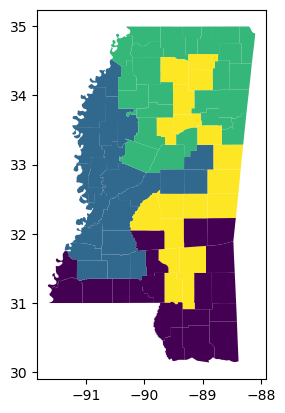

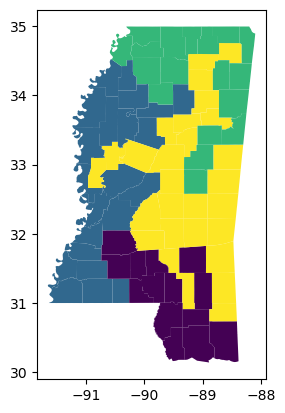

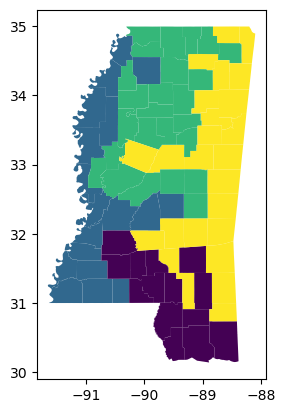

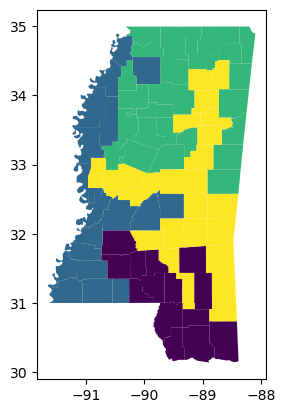

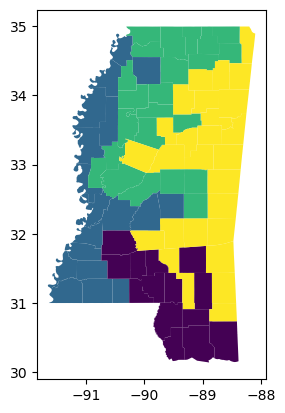

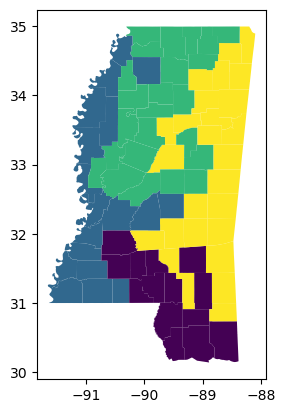

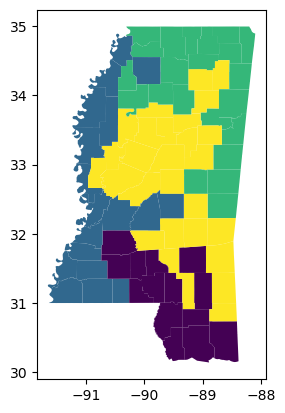

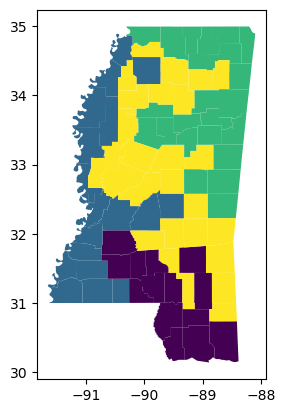

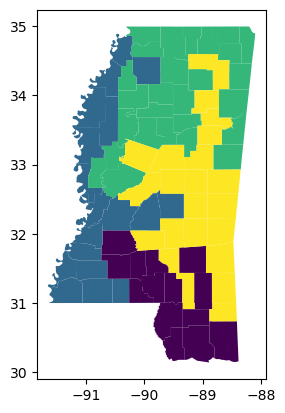

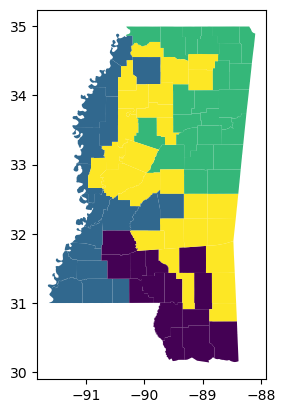

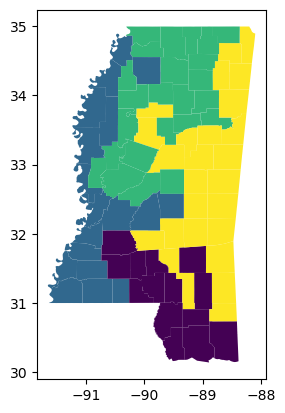

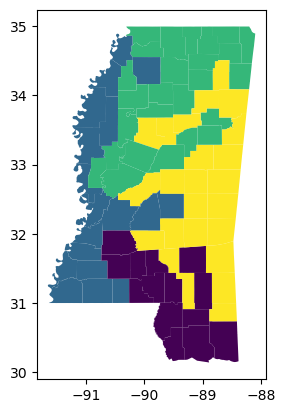

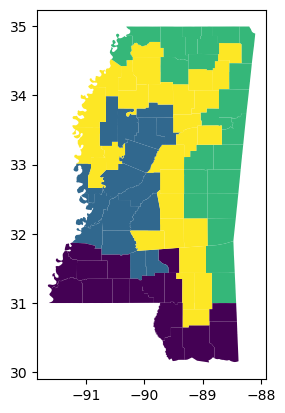

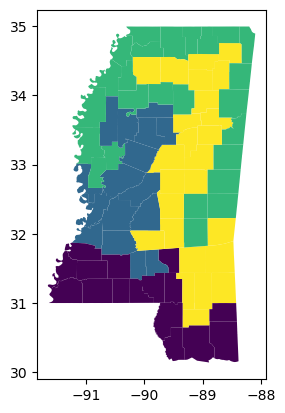

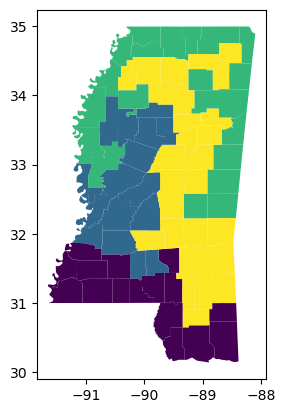

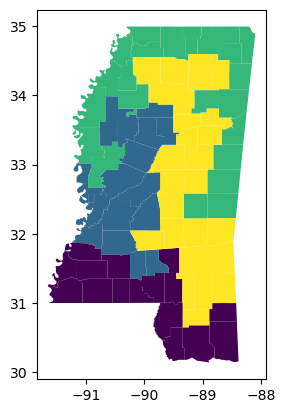

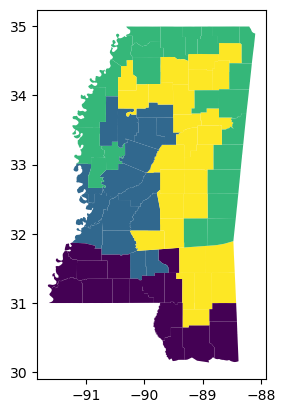

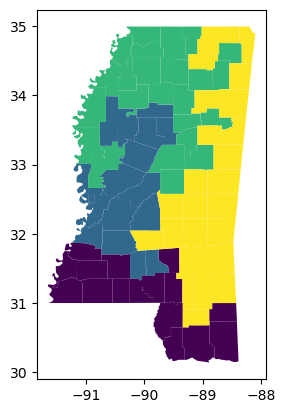

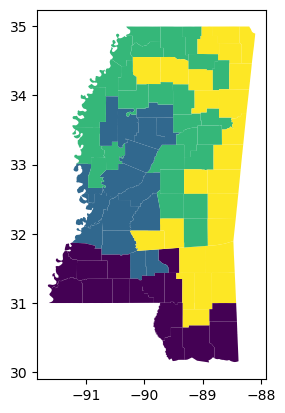

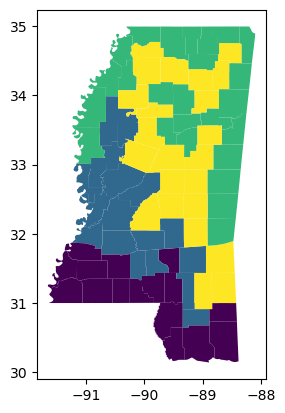

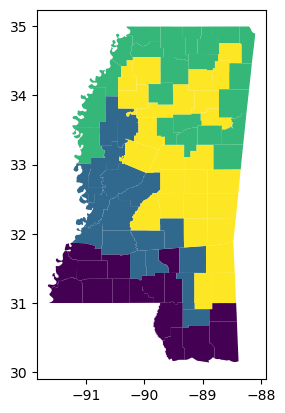

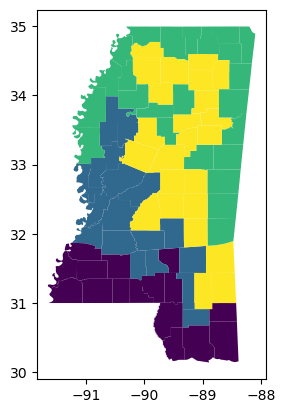

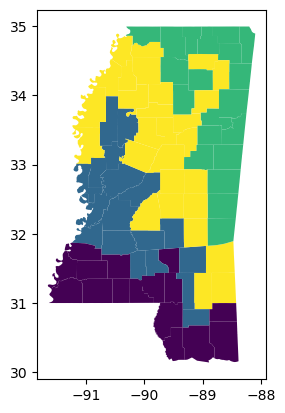

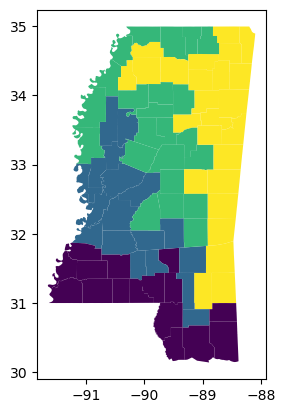

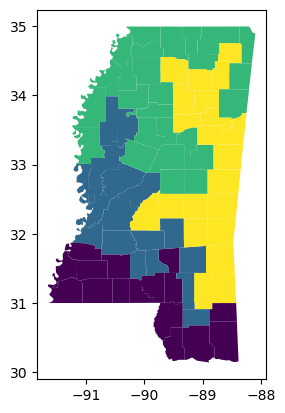

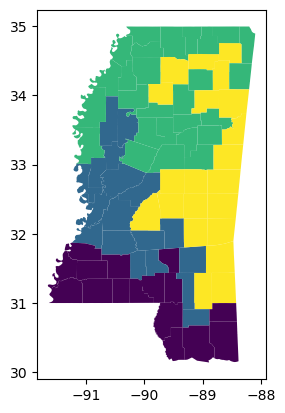

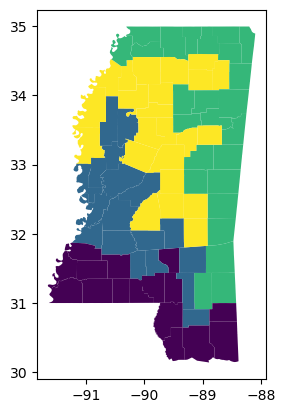

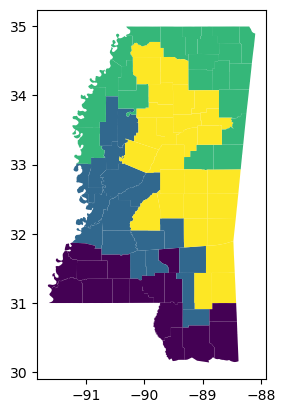

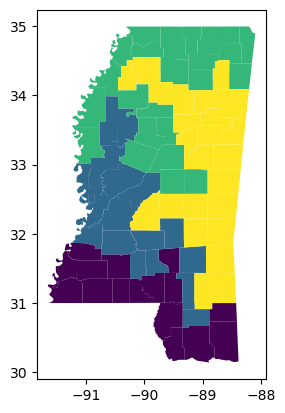

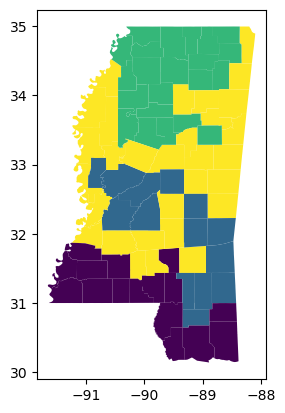

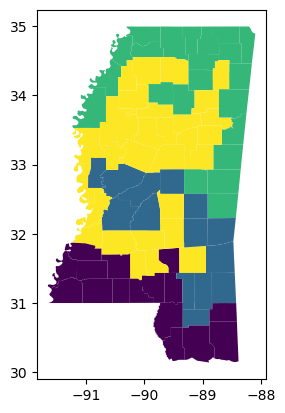

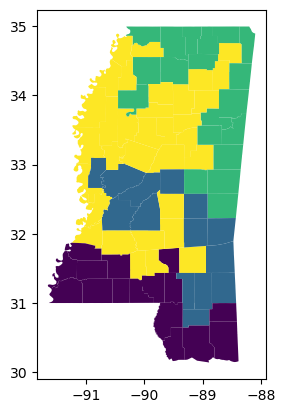

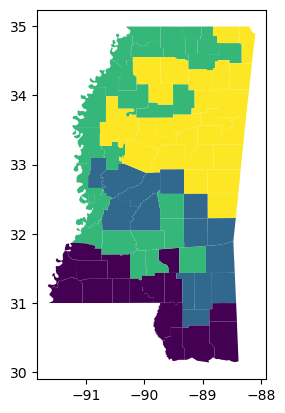

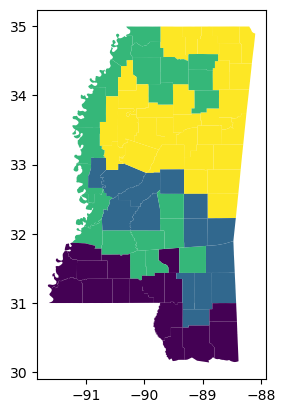

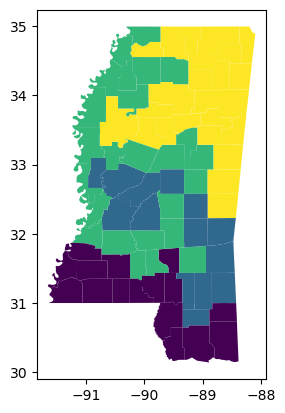

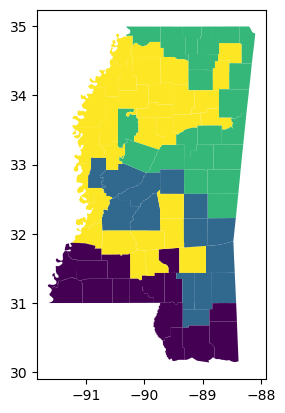

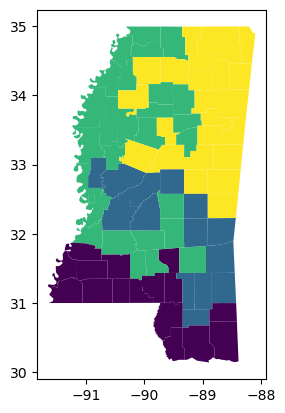

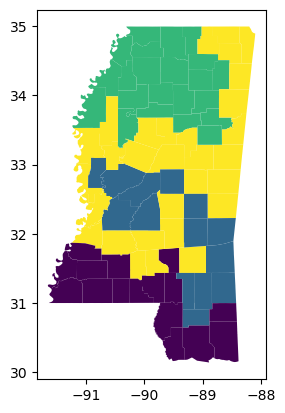

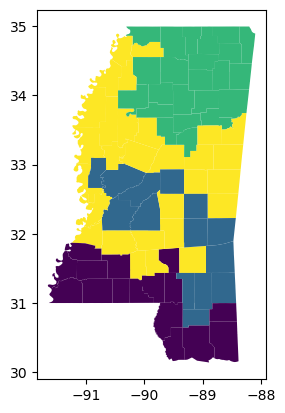

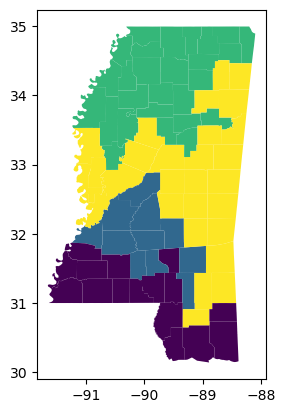

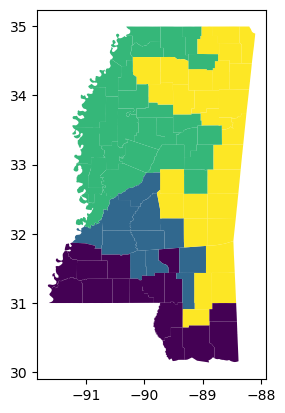

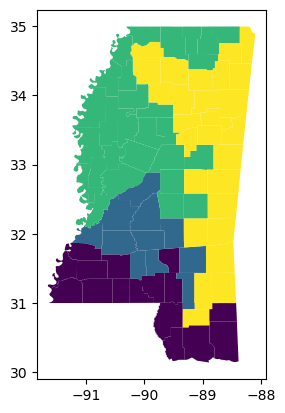

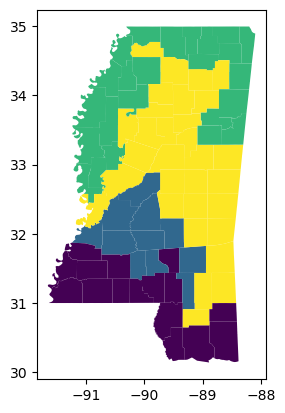

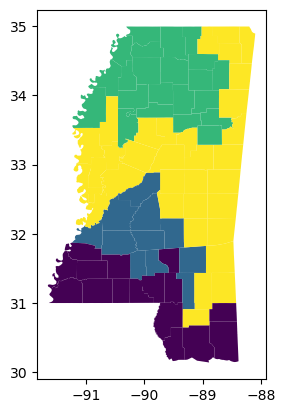

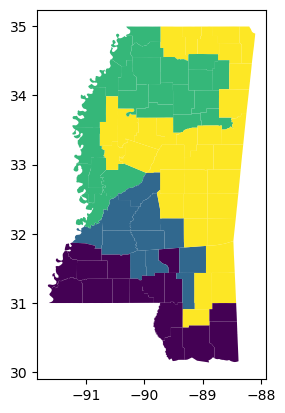

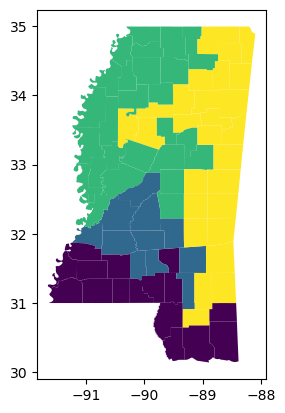

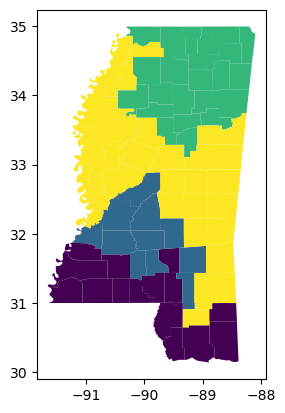

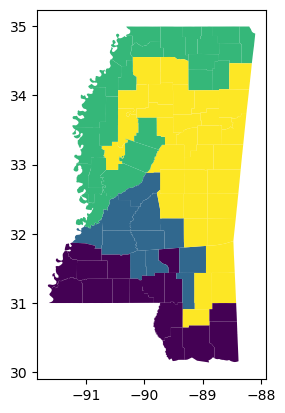

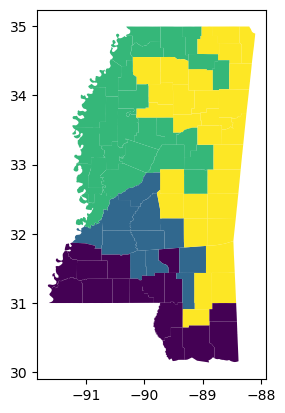

In [8]:
from util import plan_objective
from draw import draw_plan
filename = state + '_county.shp'

print("# cut_edges perimeter ave_invpp")
for p in range(len(plans)):
    plan = plans[p]
    ce = round( plan_objective(G, plan, 'cut_edges') )
    pe = round( plan_objective(G, plan, 'perimeter'), 4)
    pp = round( plan_objective(G, plan, 'inverse_polsby_popper'), 4)
    print(p, ce, pe, pp) #, plan)
    draw_plan( filepath, filename, G, plan )

In [9]:
print("plans =",plans)

plans = [[[7, 10, 11, 12, 15, 21, 22, 28, 36, 42, 43, 46, 63, 64, 72, 73, 74, 76, 77], [2, 4, 8, 14, 16, 17, 19, 20, 29, 31, 32, 34, 35, 38, 45, 50, 51, 58, 65, 66, 69], [3, 5, 6, 23, 24, 25, 26, 27, 30, 33, 37, 39, 47, 52, 53, 55, 57, 59, 61, 62, 68, 71, 78, 80], [0, 1, 9, 13, 18, 40, 41, 44, 48, 49, 54, 56, 60, 67, 70, 75, 79, 81]], [[4, 8, 12, 21, 22, 40, 42, 43, 54, 58, 63, 64, 74, 76], [2, 7, 9, 11, 14, 19, 20, 25, 27, 28, 31, 34, 35, 36, 38, 45, 50, 51, 57, 65, 66, 68], [3, 16, 23, 24, 26, 32, 33, 37, 39, 52, 53, 55, 56, 59, 62, 71, 78, 81], [0, 1, 5, 6, 10, 13, 15, 17, 18, 29, 30, 41, 44, 46, 47, 48, 49, 60, 61, 67, 69, 70, 72, 73, 75, 77, 79, 80]], [[4, 8, 12, 21, 22, 40, 42, 43, 54, 58, 63, 64, 74, 76], [7, 11, 14, 20, 23, 28, 31, 34, 35, 36, 38, 50, 51, 59, 65, 66, 75, 79], [1, 2, 3, 6, 9, 17, 19, 24, 25, 27, 29, 32, 39, 44, 45, 52, 56, 57, 60, 61, 62, 67, 68, 69, 71], [0, 5, 10, 13, 15, 16, 18, 26, 30, 33, 37, 41, 46, 47, 48, 49, 53, 55, 70, 72, 73, 77, 78, 80, 81]], [[4, 8,